 ## Heart Disease EDA, Prepocessing, Modeling

Step one: Exploratory Data Analysis using visualizations comparing the target 'TenYearCHD' to various features thay may contribute to developing heart disease.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:/Users/mirid/Documents/BRANDON SAGER WORK/framingham.csv')

In [5]:
data.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='education', ylabel='count'>

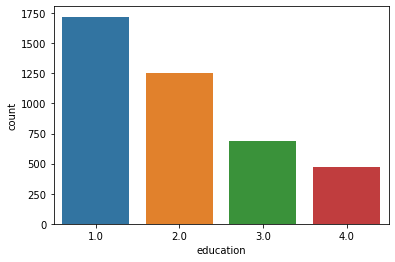

In [37]:
sns.countplot(x='education',data=data)

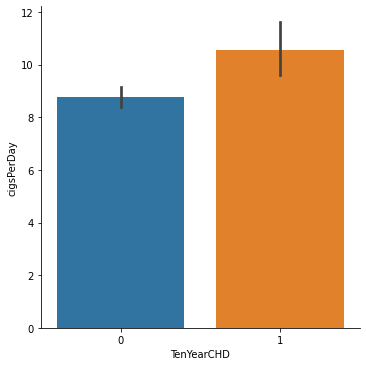

In [38]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=data)

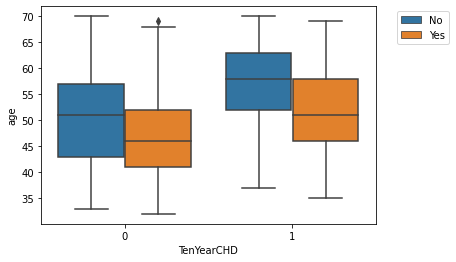

In [41]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=data)
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

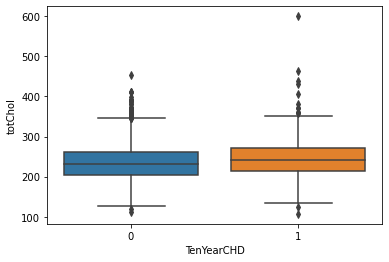

In [42]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)

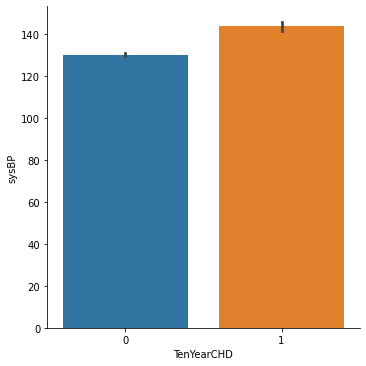

In [43]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=data)

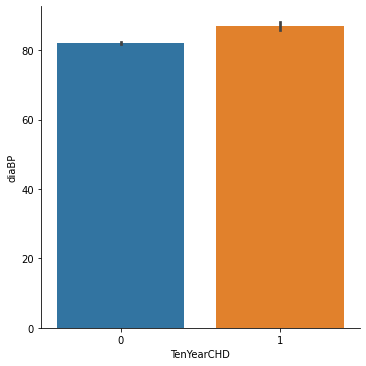

In [44]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=data)

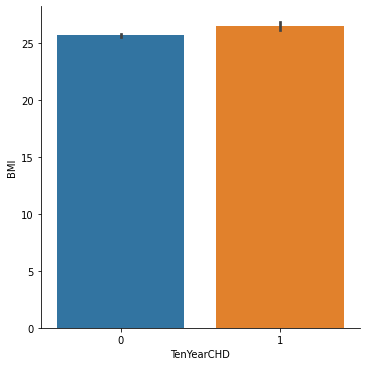

In [45]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=data)

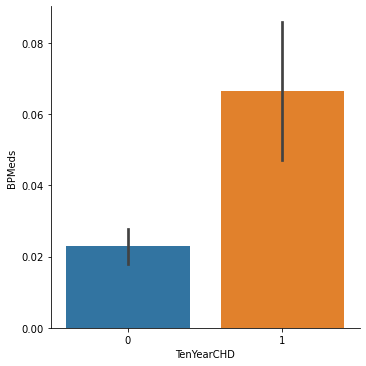

In [46]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=data)

## Preprocessing the data, dealing with missing values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 530.1+ KB


In [8]:
missing_values = data.isnull().sum()
missing_values

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Dropping missing education section, nearly impossible to impute accurately.

In [18]:
edu_missing = data[data['education'].isnull()].index
edu_missing

Int64Index([  33,   36,   72,  184,  213,  293,  305,  306,  319,  400,
            ...
            3764, 3868, 3873, 3943, 4012, 4082, 4098, 4121, 4122, 4138],
           dtype='int64', length=105)

In [19]:
data = data.drop(edu_missing)

In [20]:
data.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay          27
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

Cigarettes per day can be imputed by referencing the "current_smoke_status" data and then filling nonsmokers and smokers accordingly with "0" and median cigarrettes per day.

In [23]:
cigs_day_index = data[data['cigsPerDay'].isnull()].index
cigs_day_index

Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 3021, 3094, 3106, 3108, 3156, 3177, 3309, 3432,
            3579, 3715, 3847, 3924, 3942],
           dtype='int64')

In [27]:
smoking_status = []
for i in cigs_day_index:
    smoking_status.append(data['currentSmoker'][i])

smoking_status

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes']

There are no 'cigsPerDay' missing values for Non-smokers.

In [28]:
smokers = data[data['currentSmoker']=='Yes'].index
smokers

Int64Index([   2,    3,    4,    7,    9,   12,   14,   15,   16,   17,
            ...
            4224, 4225, 4227, 4229, 4230, 4233, 4234, 4235, 4236, 4239],
           dtype='int64', length=2046)

In [31]:
cigarettes_by_smokers = []
for i in smokers:
    if data['cigsPerDay'][i]!='nan':
        cigarettes_by_smokers.append(data['cigsPerDay'][i])

In [33]:
len(cigarettes_by_smokers)

2046

In [34]:
import statistics

In [35]:
smoker_median = statistics.median(cigarettes_by_smokers)
smoker_median

20.0

In [47]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(smoker_median)

In [48]:
data.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

For BPMed missing values, refering to blood pressure. If sysBP is greater than 140 and/or diaBP is greater than 90, setting BPMed to 1, otherwise setting to 0.

In [52]:
BP_missing_index = data[data['BPMeds'].isnull()].index
BP_missing_index

for i in BP_missing_index:
    if (data['sysBP'][i] > 140 or data['diaBP'][i] > 90):
        data.loc[i,'BPMeds'] = 1.0
    else:
        data.loc[i,'BPMeds'] = 0.0
        

In [53]:
data.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

The rest of the missing values will be filled with mean values. Imputing this way is appropriate because the size of the dataset and the nature of the features that the remaining missing values are in.

In [54]:
data['totChol'] = data['totChol'].fillna(round(data['totChol'].mean()))

In [55]:
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [56]:
data['glucose'] = data['glucose'].fillna(round(data['glucose'].mean()))

In [57]:
#Will use backfill for single missing value in 'heartRate'

data['heartRate'] = data['heartRate'].fillna(method='bfill',axis=0)

In [58]:
data.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [84]:
sex = pd.get_dummies(data.Sex, drop_first=True)
data['sex'] = sex
data.drop('Sex',axis=1,inplace=True)

In [92]:
No_Diabetes = pd.get_dummies(data.diabetes,drop_first=True)
data['No_Diabetes'] = No_Diabetes
data.drop('diabetes',axis=1,inplace=True)

In [93]:
data.currentSmoker.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: currentSmoker, dtype: object

In [95]:
Non_Smoker = pd.get_dummies(data.currentSmoker,drop_first=True)
data['Non_Smoker'] = Non_Smoker
data.drop('currentSmoker',axis=1,inplace=True)

## Train-test split

In [59]:
from sklearn.model_selection import train_test_split

In [96]:
X = data.drop('TenYearCHD',axis=1)
y = data.TenYearCHD

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [101]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = XGBoostClassifier()

In [98]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
model.score(X_test,y_test)

0.7799274486094316